In [13]:
import numpy as np

x = np.array(np.random.randint(low = 1, high = 10, size = 18).reshape((9, 2)), dtype = float)

# 단계 1: 설정

In [15]:
k = 2
centroids = np.array([[2, 5], [7, 2]], dtype = float)

In [18]:
def normDist(x1, x2):
    dist = np.linalg.norm(x1 - x2)
    return dist

In [21]:
# 가장 가까운 센트로이드에 할당됨
minDist = np.inf

for j in range(k):
    distJ0 = normDist(centroids[j], x[0])
    print('Distance {:.3f} between {} and {}'.format(distJ0, centroids[j], x[0]))
    if distJ0 < minDist:
        minDist = distJ0
        minIndex = j
print('.....Assigning {} to {}th centroid by {:.3f}'.format(x[0], minIndex, minDist))
    

Distance 1.414 between [2. 5.] and [3. 6.]
Distance 5.657 between [7. 2.] and [3. 6.]
.....Assigning [3. 6.] to 0th centroid by 1.414


In [22]:
clusterAssigned = np.zeros(shape = (x.shape[0], 2), dtype = float)
print(clusterAssigned) # index와 dist를 저장

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [24]:
row, c = x.shape
for i in range(row):
    minDist = np.inf
    minIndex = -1
    for j in range(k):
        distJI = normDist(centroids[j], x[i])
        if distJI < minDist:
            minDist = distJI
            minIndex = j
    print('.....Assigning {} to {}th centroid by {:.3f}'.format(x[i], minIndex, minDist))
    clusterAssigned[i] = [minIndex, minDist]

.....Assigning [3. 6.] to 0th centroid by 1.414
.....Assigning [7. 5.] to 1th centroid by 3.000
.....Assigning [8. 5.] to 1th centroid by 3.162
.....Assigning [9. 5.] to 1th centroid by 3.606
.....Assigning [2. 7.] to 0th centroid by 2.000
.....Assigning [2. 2.] to 0th centroid by 3.000
.....Assigning [5. 4.] to 1th centroid by 2.828
.....Assigning [6. 2.] to 1th centroid by 1.000
.....Assigning [6. 3.] to 1th centroid by 1.414


# 단계 3: 갱신

In [25]:
clusterAssigned[:, 0]

array([0., 1., 1., 1., 0., 0., 1., 1., 1.])

In [26]:
x[clusterAssigned[:, 0] == 0]

array([[3., 6.],
       [2., 7.],
       [2., 2.]])

In [27]:
x[clusterAssigned[:, 0] == 1]

array([[7., 5.],
       [8., 5.],
       [9., 5.],
       [5., 4.],
       [6., 2.],
       [6., 3.]])

In [29]:
_centroids = np.zeros(shape = (k, x.shape[1]), dtype = float)

In [30]:
for cent in range(k):
    _centroids[cent] = np.mean(x[clusterAssigned[:, 0] == cent], axis = 0)
    
print('Centroids updated: \n', _centroids)

Centroids updated: 
 [[2.33333333 5.        ]
 [6.83333333 4.        ]]


In [43]:
comparison = np.equal(centroids, _centroids)
print(comparison.all())

[[2. 5.]
 [7. 2.]] [[2.33333333 5.        ]
 [6.83333333 4.        ]]
False


In [44]:
comparison = np.isclose(centroids, _centroids)
print(comparison.all())

False


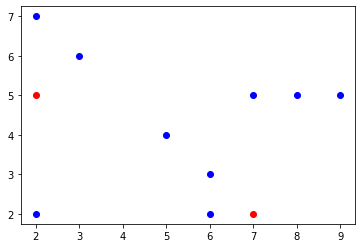

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 1], color = 'blue')
plt.scatter(centroids[:, 0], centroids[:, 1], color = 'red')

In [47]:
def cluster(x, k, centroids):
    row, col = x.shape
    clusterAssigned = np.zeros(shape=(row, k), dtype=float)
    clusterUpdated=True
    iter = 1
    while(clusterUpdated):
        print ("\n\n====== Iteration {} ======".format(iter))
        # STEP 1: assign to closer cluster
        for i in range(row):
            minDist = np.inf
            minIndex = -1
            for j in range(k):
                distJI = normDist(centroids[j], x[i])
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            print (".....Assigning {} to {}th centroid by {:.3f}".format(x[i], minIndex, minDist))
            clusterAssigned[i] = [minIndex, minDist]
        print ("\n.....Assigned clusters: \n {}".format(clusterAssigned))
        # STEP 2: update centroids
        _centroids=np.zeros(shape = (k, x.shape[1]), dtype=float)
        for cent in range(k):
            _centroids[cent] = np.mean(x[clusterAssigned[:,0]==cent],axis=0)
        # STEP 3: see if centroids is updated. STOP if NOT updated
        comparison = np.equal(centroids, _centroids) # np.isclose() in case some tolerence is required
        if(comparison.all() == True):
            print ("\n.....NOT Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            clusterUpdated = False
            return centroids, clusterAssigned
        else:
            print ("\n.....Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            centroids = _centroids
            iter += 1

In [49]:
def draw(x, centroids):
    plt.scatter(x[:,0], x[:,1], color='blue')
    plt.scatter(centroids[:,0], centroids[:,1], color='red')



====== Iteration 1 ======
.....Assigning [2. 5.] to 0th centroid by 0.000
.....Assigning [3. 6.] to 0th centroid by 1.414
.....Assigning [2. 4.] to 0th centroid by 1.000
.....Assigning [5. 7.] to 0th centroid by 3.606
.....Assigning [7. 2.] to 1th centroid by 0.000
.....Assigning [8. 3.] to 1th centroid by 1.414
.....Assigning [9. 4.] to 1th centroid by 2.828
.....Assigning [8. 4.] to 1th centroid by 2.236
.....Assigning [7. 3.] to 1th centroid by 1.000

.....Assigned clusters: 
 [[0.         0.        ]
 [0.         1.41421356]
 [0.         1.        ]
 [0.         3.60555128]
 [1.         0.        ]
 [1.         1.41421356]
 [1.         2.82842712]
 [1.         2.23606798]
 [1.         1.        ]]

.....Updating Centroids
 [[2. 5.]
 [7. 2.]] => 
[[3.  5.5]
 [7.8 3.2]]


====== Iteration 2 ======
.....Assigning [2. 5.] to 0th centroid by 1.118
.....Assigning [3. 6.] to 0th centroid by 0.500
.....Assigning [2. 4.] to 0th centroid by 1.803
.....Assigning [5. 7.] to 0th centroid by 2

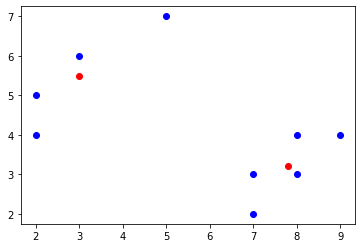

In [50]:
%matplotlib inline
x = np.array([[2,5],[3,6],[2,4],[5,7],[7,2],[8,3],[9,4],[8,4],[7,3]], dtype = float)
#x = np.array([[1, 2],[1, 4],[1, 0],[4, 2],[4, 4],[4, 0]])
k = 2
centroids = np.array([[2,5],[7,2]], dtype = float)
#centroids = np.array([[1,1],[4,1]], dtype = float)
centroids, clusterAssigned = cluster(x, k, centroids)
draw(x, centroids)